# Machine Learning Project on Disease Predictions using Symptoms

# Problem Statement

Now-a-days, people face various diseases due to the environmental condition and their living habits. So the prediction of disease at earlier stage becomes important task. But the accurate prediction on the basis of symptoms becomes too difficult for doctor. The correct prediction of disease is the most challenging task. To overcome this problem data mining plays an important role to predict the disease. 
With the help of disease data, data mining finds hidden pattern information in the huge amount of medical data. I proposed general disease prediction based on symptoms of the patient.

# Data Collection
I used Disease Prediction dataset by KAUSHIL268 in Kaggle is used. The Excel csv file that was extracted as at 27 Jan 2022 for the purpose of this task is available at https://www.kaggle.com/kaushil268/disease-prediction-using-machine-learning.

<a id = "1"></a>
### Data Preprocessing
<a id = "2"></a>
#### Import Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id = "3"></a>
#### Import Dataset

In [184]:
# It's already splitted as train and test data. So we had better import them train_data and test_data

train_data = pd.read_csv("project/Training.csv")
test_data = pd.read_csv("project/Testing.csv")

In [185]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [186]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


Data has 134 columns. The 132 of the columns are symptoms, encoded integer data, and the "prognosis" column is categorical data for disease labels.

In [187]:
train_data.isnull().any()  #there is an unclean column named "Unnamed: 133". We will drop it

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Unnamed: 133             True
Length: 134, dtype: bool

In [188]:
# we dont need Unnamed: 133 column to train
train_data.drop(["Unnamed: 133"], axis = 1, inplace = True)

In [189]:
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [190]:
# list of all symptoms
columns = list(train_data.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


# Data visualization

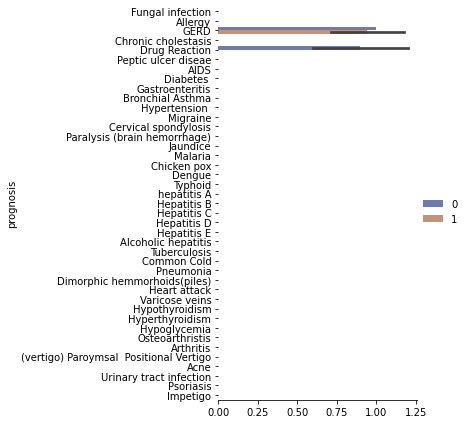

In [191]:
import seaborn as sns
g = sns.catplot(
    data=train_data, kind="bar",
    x="stomach_pain", y="prognosis", hue="acidity",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "prognosis")
g.legend.set_title("")

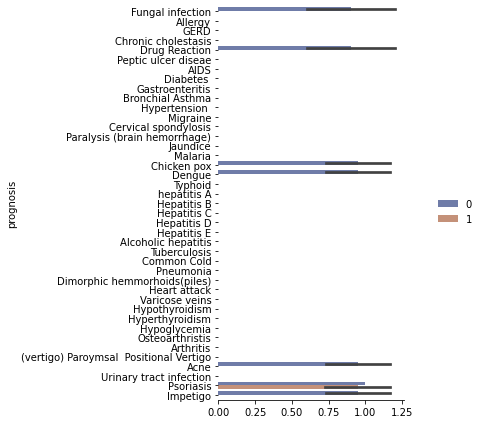

In [192]:
import seaborn as sns
g = sns.catplot(
    data=train_data, kind="bar",
    x="skin_rash", y="prognosis", hue="skin_peeling",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "prognosis")
g.legend.set_title("")

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



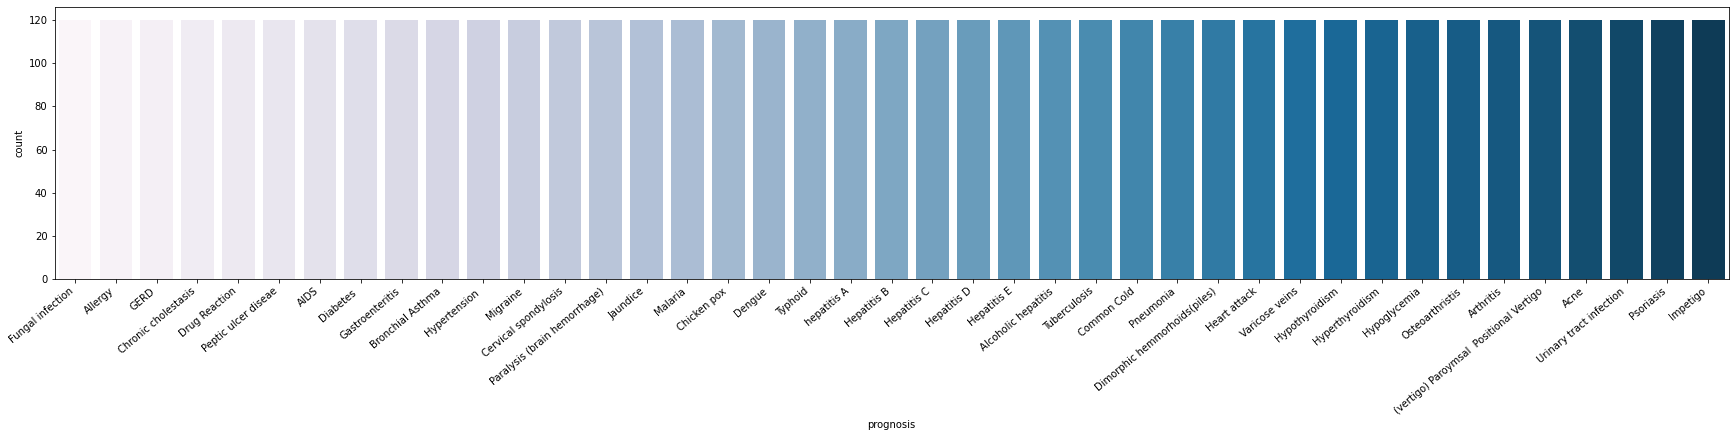

In [193]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(train_data['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

<ipython-input-194-0634a1ef1a43>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



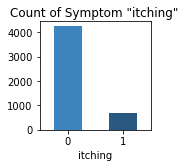

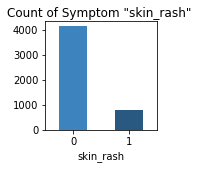

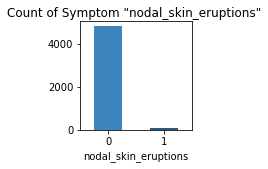

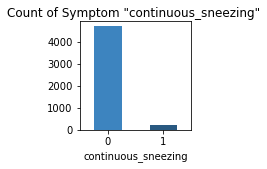

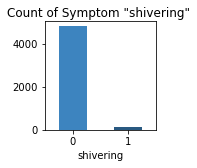

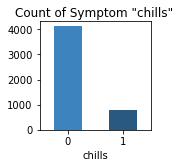

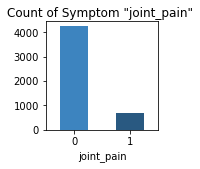

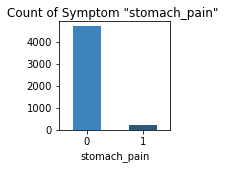

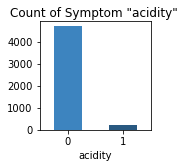

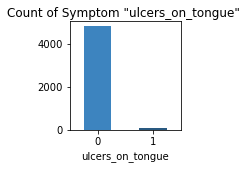

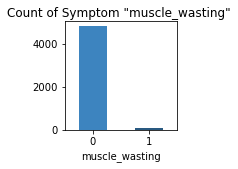

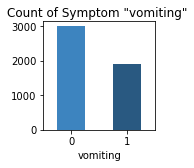

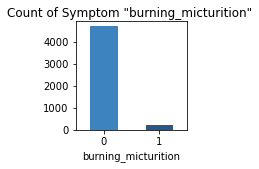

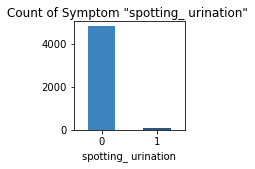

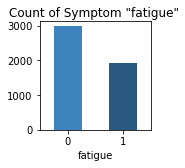

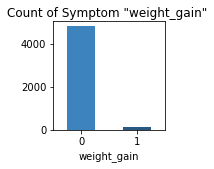

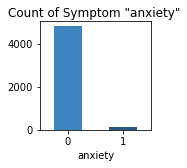

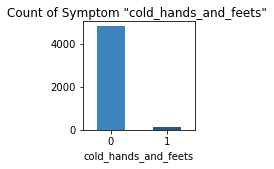

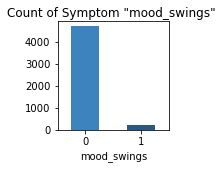

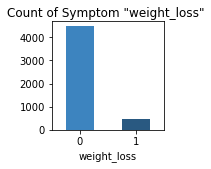

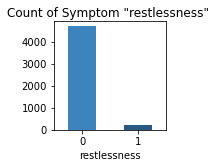

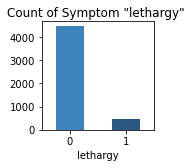

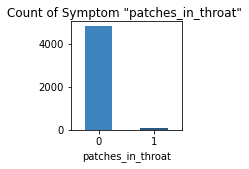

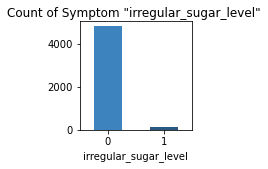

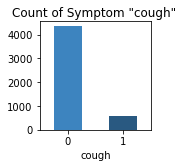

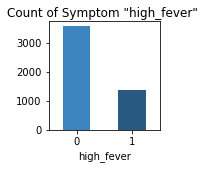

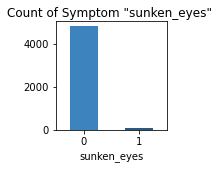

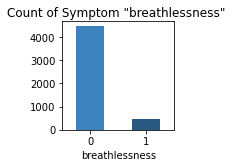

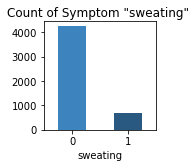

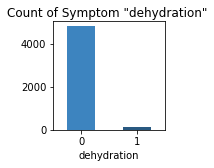

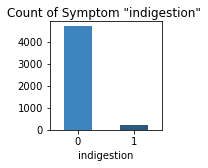

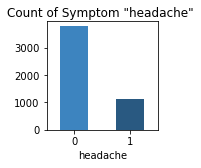

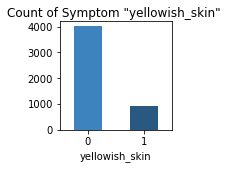

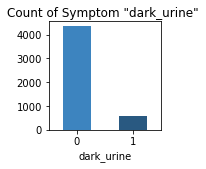

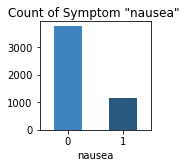

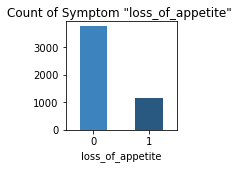

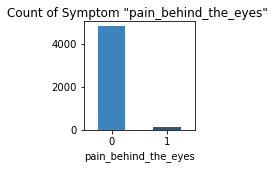

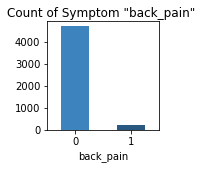

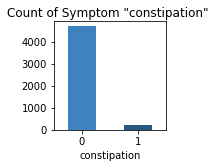

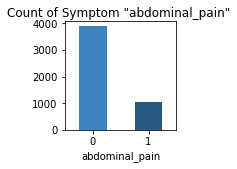

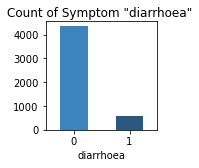

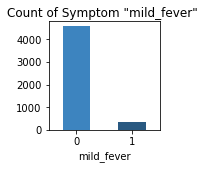

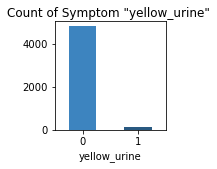

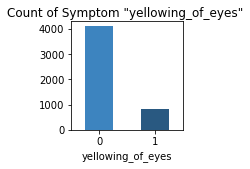

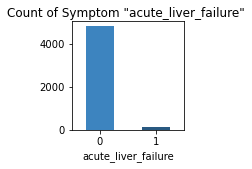

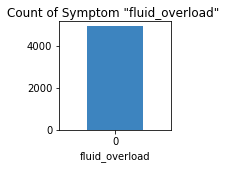

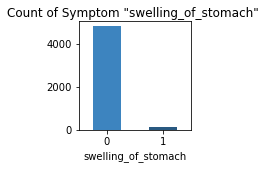

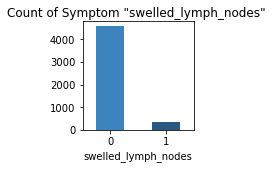

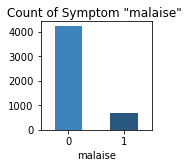

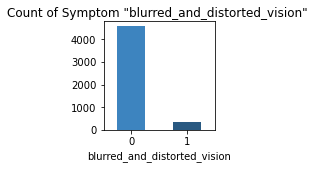

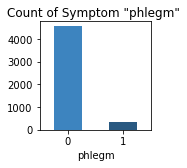

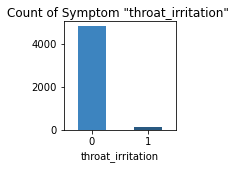

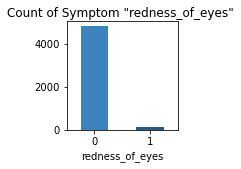

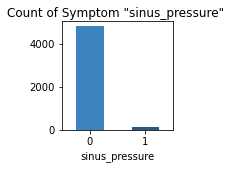

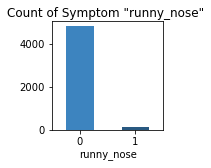

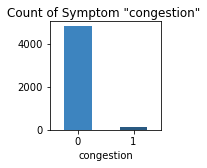

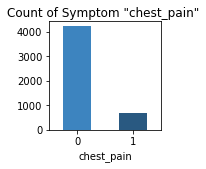

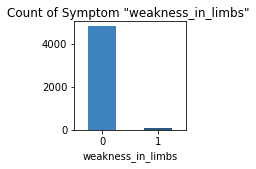

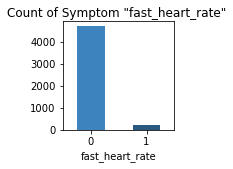

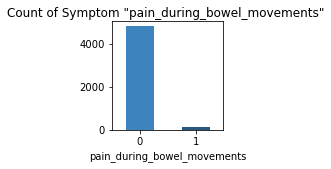

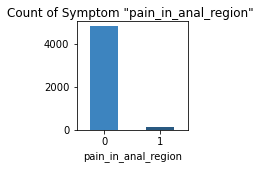

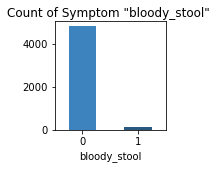

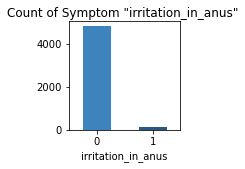

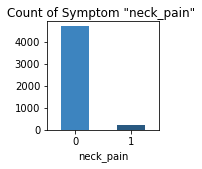

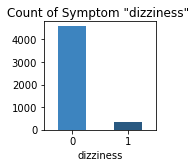

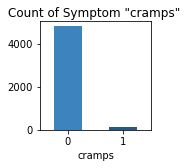

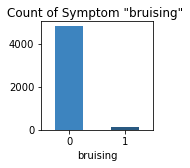

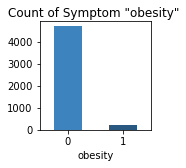

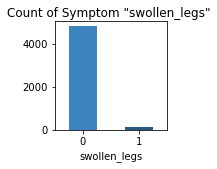

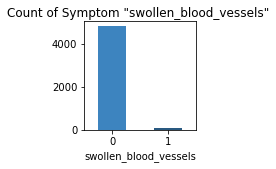

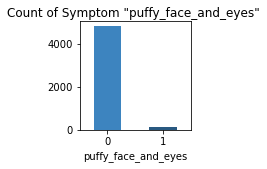

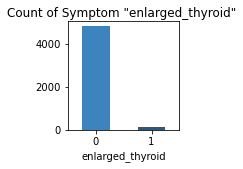

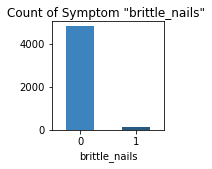

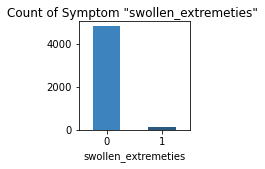

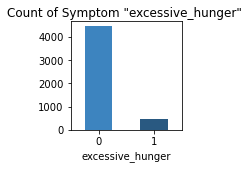

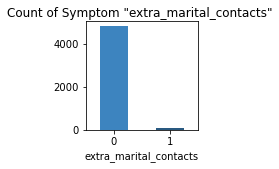

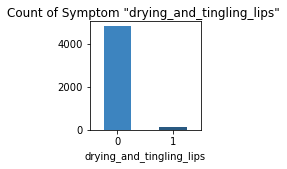

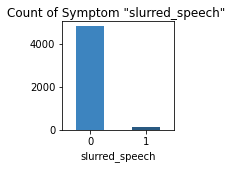

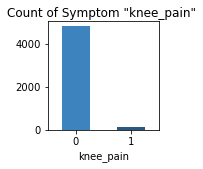

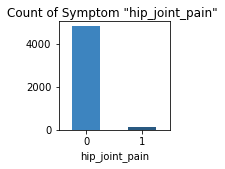

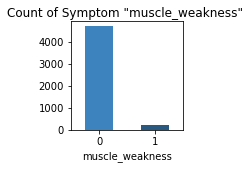

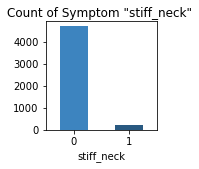

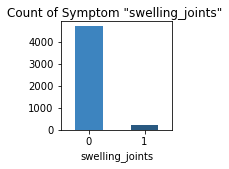

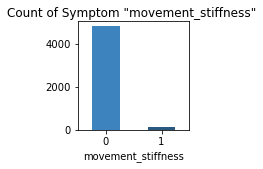

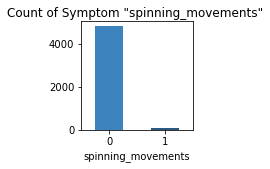

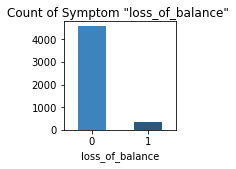

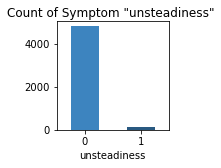

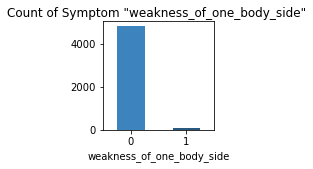

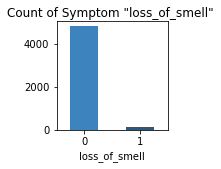

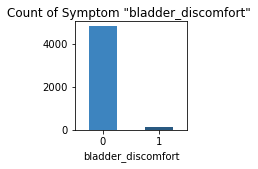

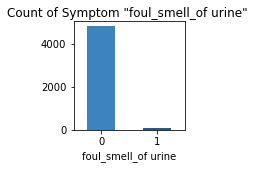

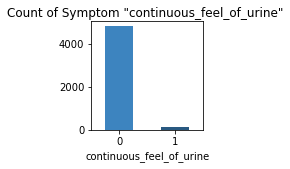

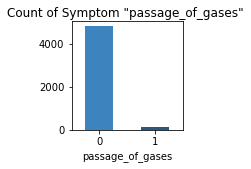

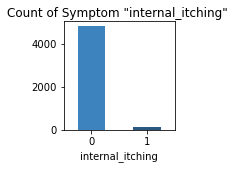

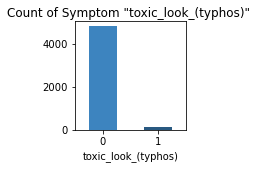

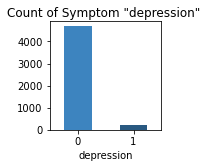

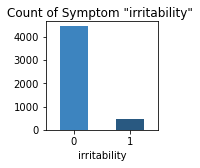

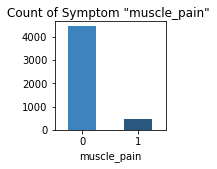

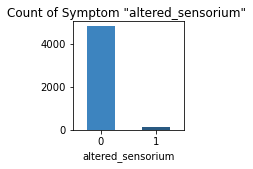

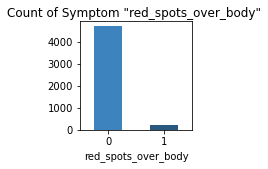

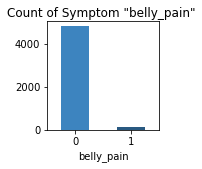

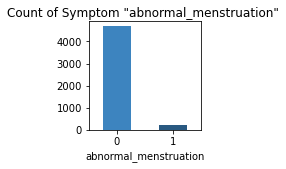

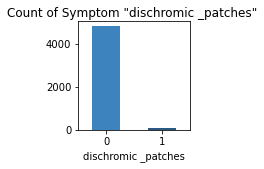

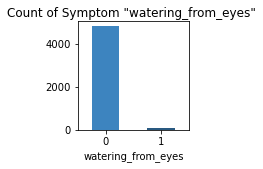

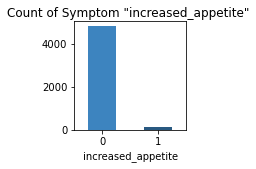

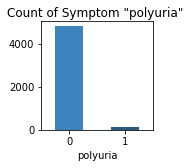

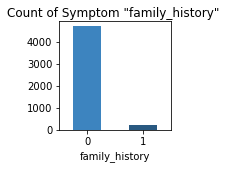

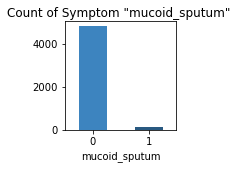

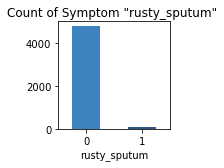

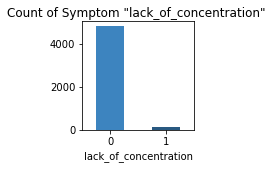

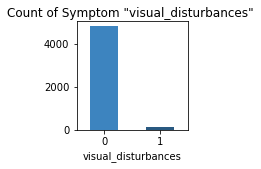

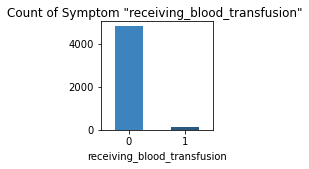

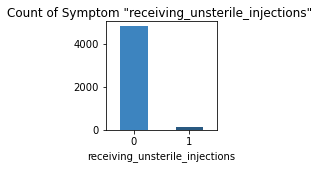

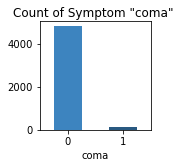

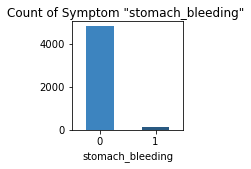

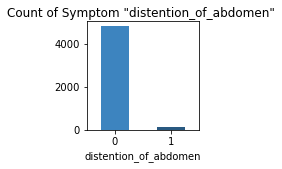

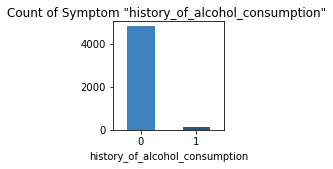

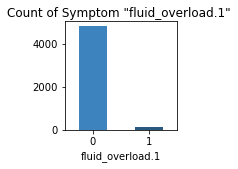

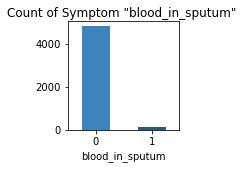

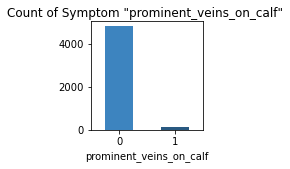

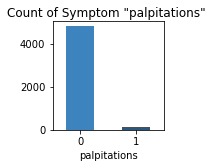

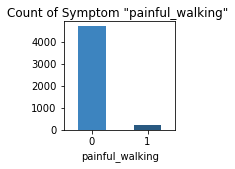

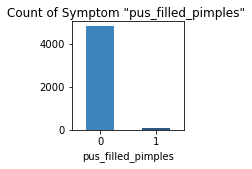

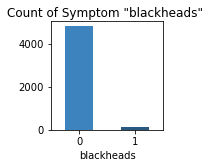

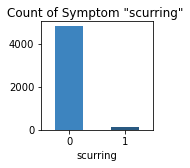

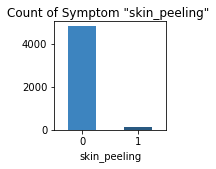

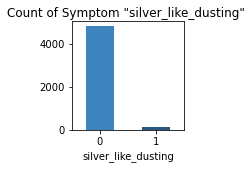

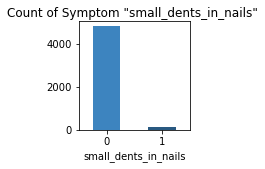

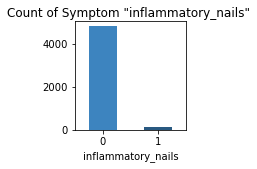

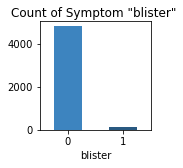

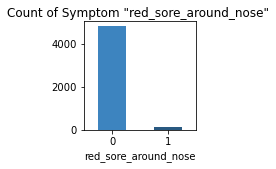

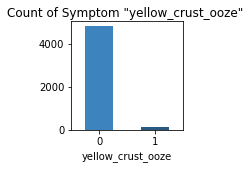

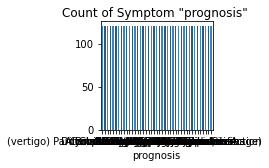

In [194]:
colors = ['#3d84bf', '#295981']
columns = list(train_data.columns)
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = train_data.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

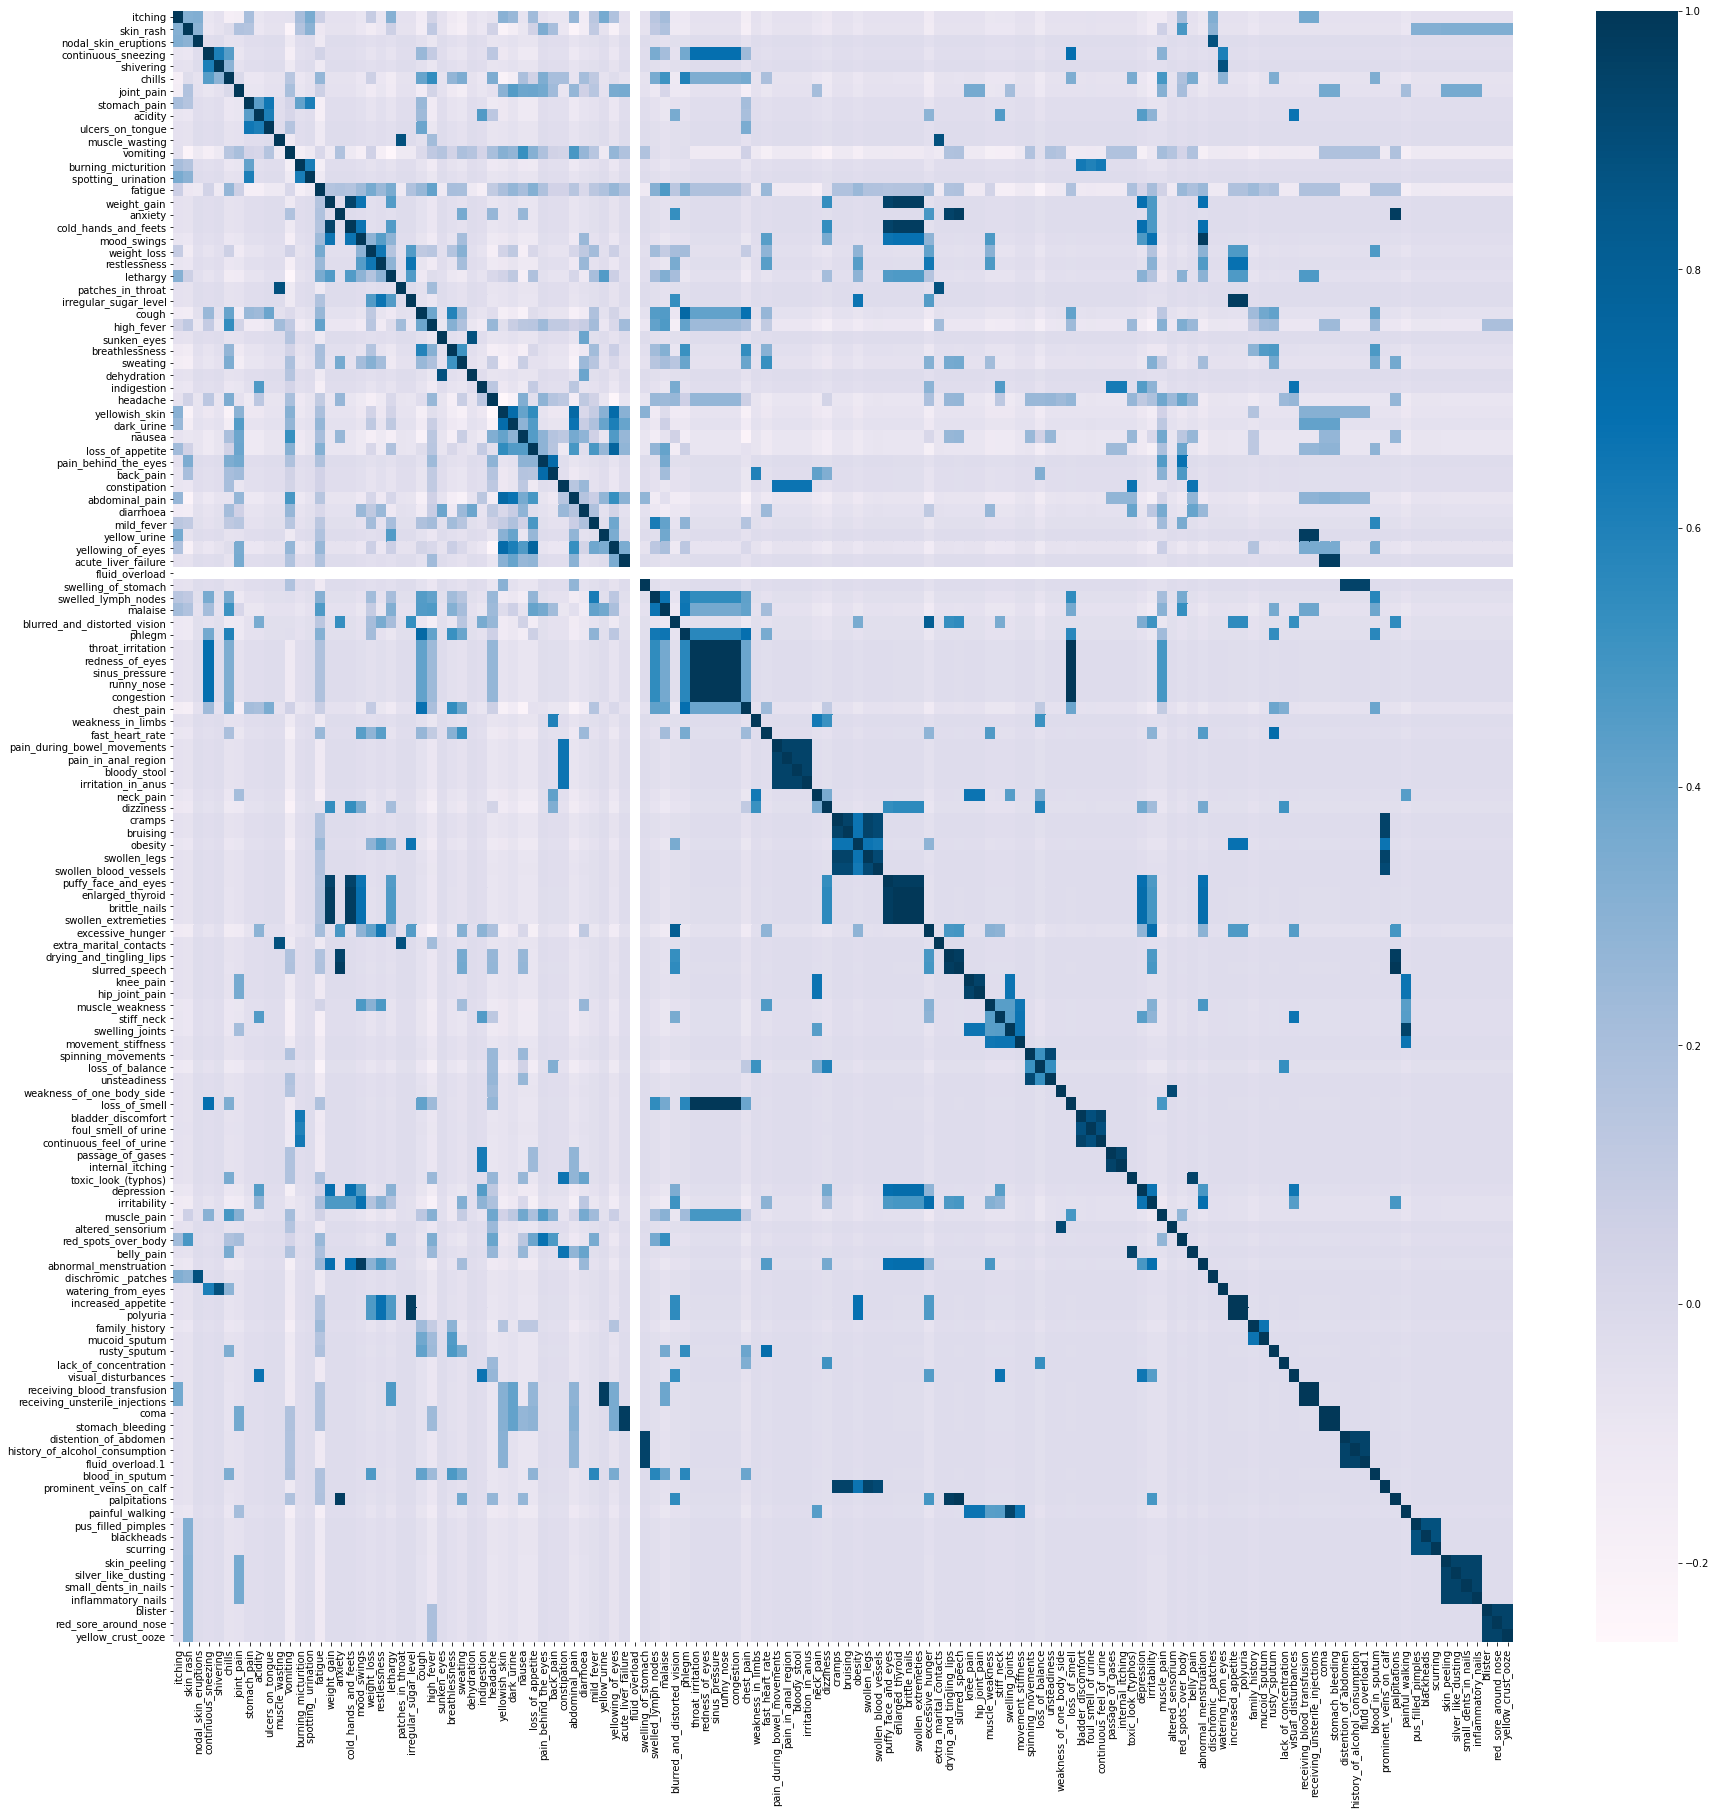

In [195]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(train_data.corr(), cmap = 'PuBu', annot = False)
plt.show()

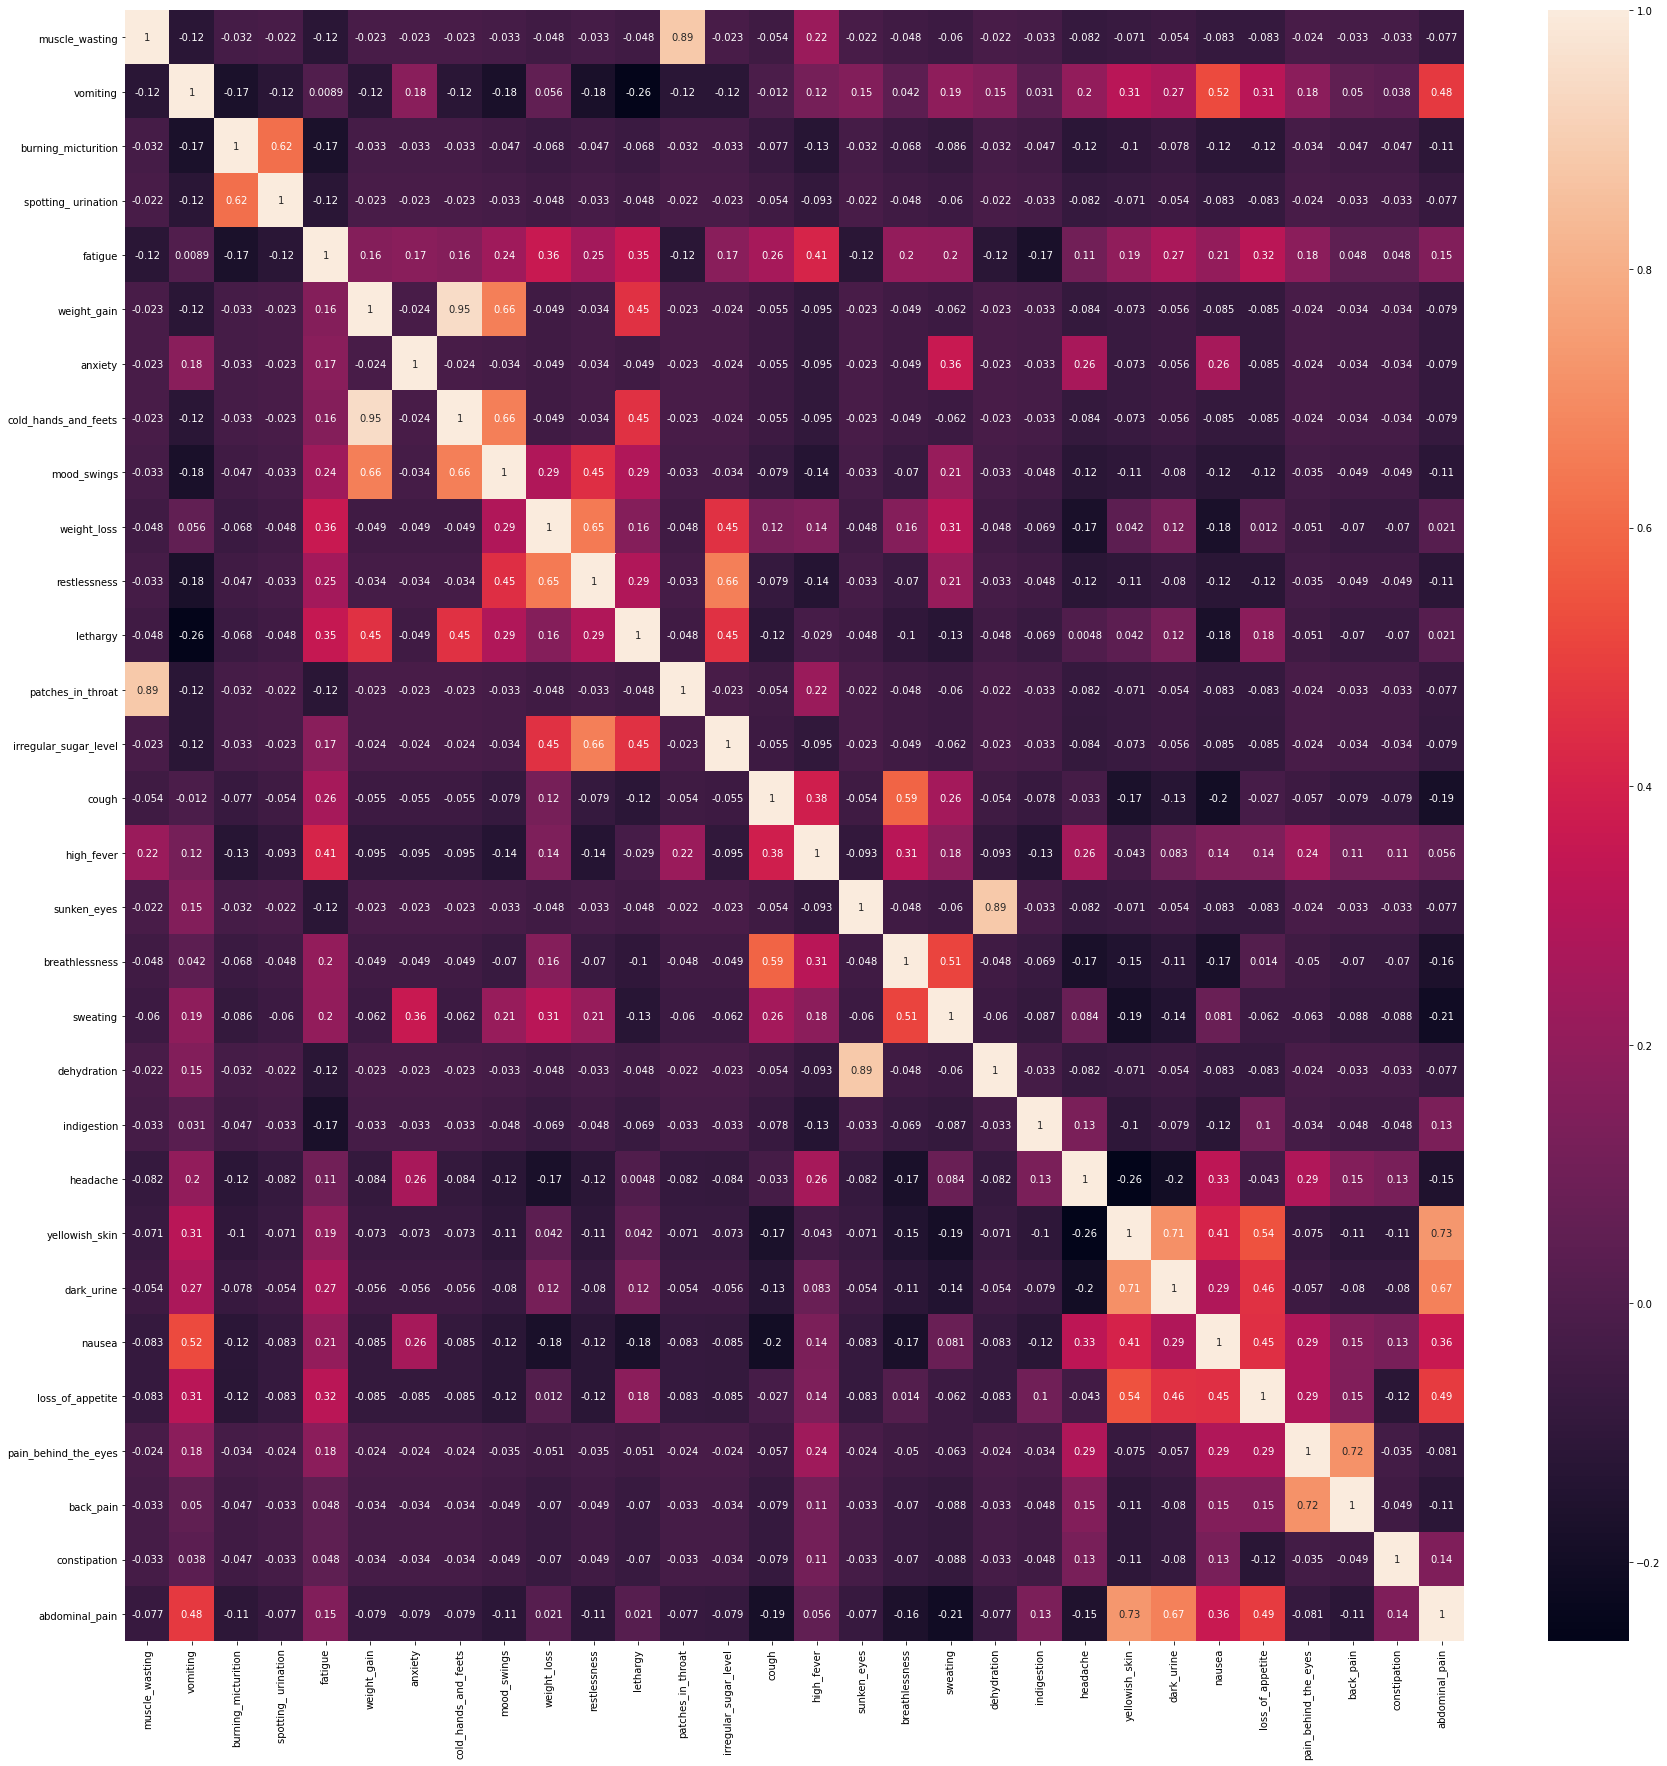

In [196]:
df_corr = train_data.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

As we look at from correlation map, we can infer these:

yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
restlessness and irregular sugar usually seem together


Lastly, the summary statistics will be considered.

In [197]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
train_data.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id = "4"></a>
#### Encoding Categorical Data

The data is already encoded but anyhow I will show how to encode categorical data.

In [198]:
# Label Encoding
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

# Lets assume we have categorical labels at first column (itching). If this column has True-False values or like Male-Female,
# then it will tranform into 1-0 encoding. This is encoding. But as I say before, there is no need for encoding on this dataset

# train_data.loc[:, 0] = labelencoder.fit_transform(train_data.iloc[:, 0])
# train_data

In [199]:
# One hot encoding
# from sklearn.preprocessing import OneHotEncoder

# Lets assume our second column (skin_rash) has more than two labels. This time, we will have to one hot encode the feature
# First, we need to apply label encoding similarly as we did in the itching variable
# After applying label encoding, now it's time to appy One Hot Encoding

# onehotencoder = OneHotEncoder(categorical_features = [1])
# labelencoder2 = LabelEncoder()
# train_data.loc[:,1] = labelencoder2.fit_transform(train_data.iloc[:, 1])
# train_data = onehotencoder.fit_transform(train_data).toarray()

<a id = "5"></a>
#### Create Test and Train Data

In [200]:
X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]
y_test = test_data.iloc[:, -1:]

In [201]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (4920, 132)
y train shape:  (4920, 1)


* Our x train data has 132 features and 4920 observation unit that means our input matrix has 4920 rows and 132 columns for training
* Our y train data has one feature (itself) and 4920 observation unit that means our output matrix has 4920 rows and 1 column for training

In [202]:
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

X test shape:  (42, 132)
y test shape:  (42, 1)


* Our x test data has 132 features and 42 observation unit that means our input matrix has 42 rows and 132 columns for prediction
* Our y test data has one feature (itself) and 42 observation unit that means our output matrix has 42 rows and 1 column for prediction

<a id = "6"></a>
#### Feature Scaling for Numerical Data

In [203]:
# Example of standardization and normalization

x = np.array([1,23,5,564,56,876,7,-123])

standardized_X = (x - np.mean(x)) / np.std(x)
normalized_X = (x-np.min(x) / np.max(x) - np.min(x))
print("Standardized array: ",standardized_X)
print("Normalized array: ",normalized_X )

Standardized array:  [-0.53531619 -0.46806733 -0.52308913  1.18564322 -0.36719405  2.13935429
 -0.5169756  -0.91435521]
Normalized array:  [1.24140411e+02 1.46140411e+02 1.28140411e+02 6.87140411e+02
 1.79140411e+02 9.99140411e+02 1.30140411e+02 1.40410959e-01]


In [204]:
# With sklearn scalers
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
x = x.reshape(-1,1)  # for sklearn methods. they use two dimensional vectors
x = stds.fit_transform(x)

<a id = "9"></a>
#### Fitting Model and Prediction

In [205]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)
y_train_dum

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [206]:
# transform into dummies for y_test (prognosis variable)
y_test_dum = pd.get_dummies(y_test)
y_test_dum

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
y_test_dum.head()

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
y_train=y_train_dum.iloc[:, -1:]
y_test=y_test_dum.iloc[:, 40].values

In [209]:
y_train

,prognosis_hepatitis A
0,0
1,0
2,0
3,0
4,0
...,...
4915,0
4916,0
4917,0
4918,0


In [210]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

# Model Building

# Logistic Regression

In [211]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression

In [212]:
#Fit  Logistic Regression 
lr=LogisticRegression()

In [213]:
lr.fit(X_train ,y_train)

C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [214]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [215]:
#predict
predict=lr.predict(X_test)

In [216]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Checking accuracy of the model

In [217]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix
from pandas import Series,DataFrame

In [218]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [219]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

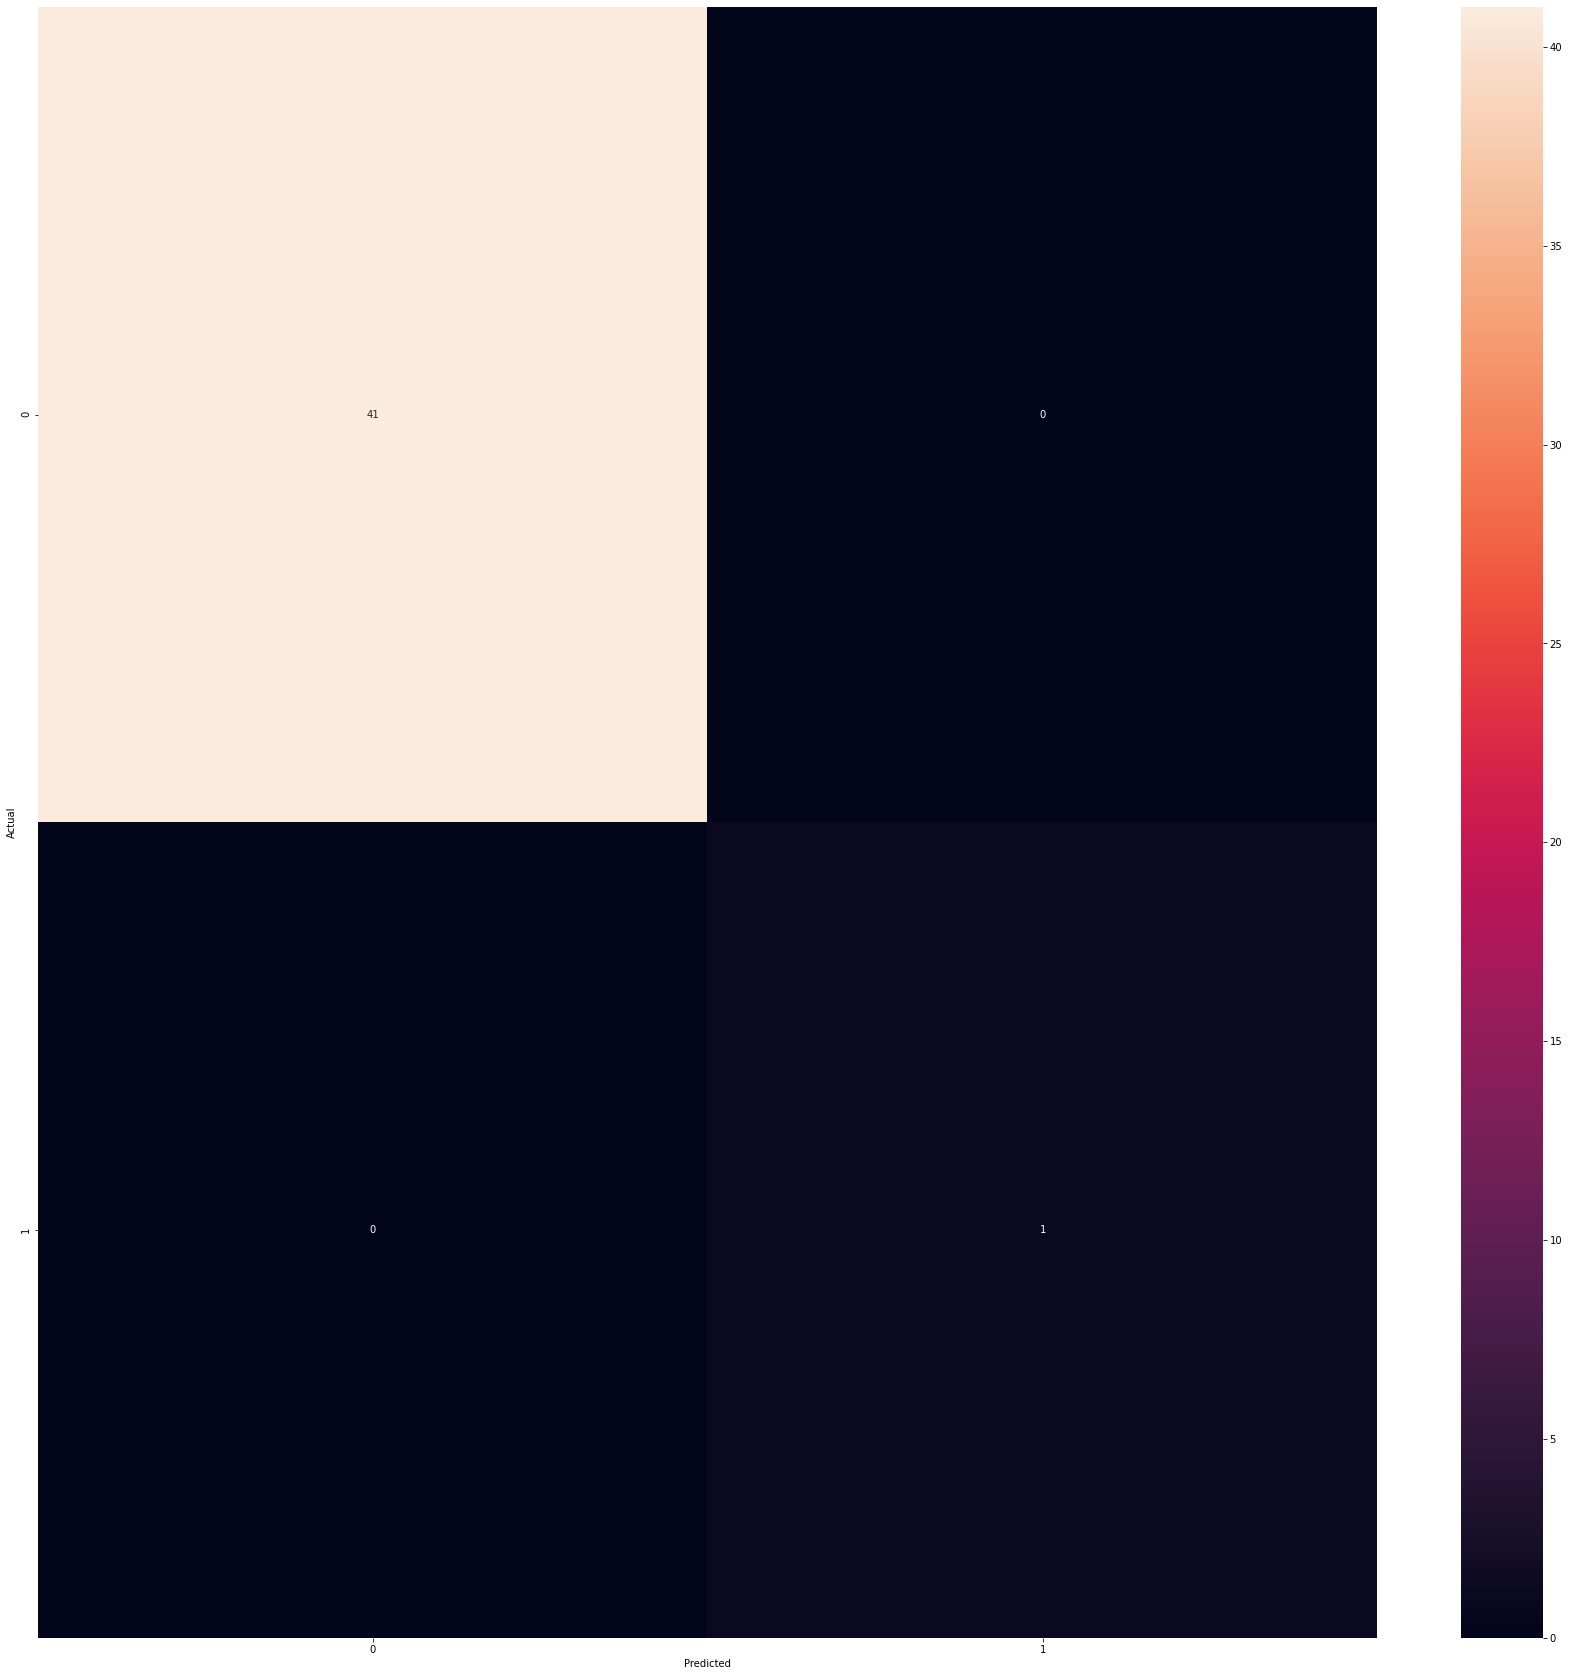

In [220]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (30, 30))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [221]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [222]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [223]:
print(accuracy_score(y_test,predict))

1.0


In [224]:

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_probabilities = lr.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# # auc scores
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)

1.0


In [226]:
# predict probabilities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = lr.predict_proba(X_test)

In [227]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

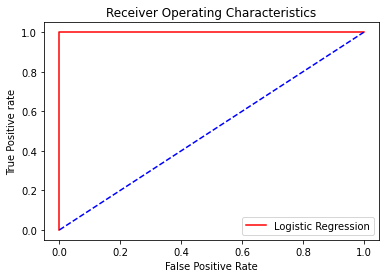

In [228]:
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('Receiver Operating Characteristics')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# Decision Tree

# Create Test and Train Data

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree

In [230]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [231]:
# use the chosen three models to make predictions on test data
y_predDT = classifierDT.predict(X_test)

In [232]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[41  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Train Accuracy:  1.0
Test Accuracy:  1.0


In [233]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


Compare the train-set and test-set accuracy


In [234]:
y_pred_train_gini = classifierDT.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [235]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


# Check for overfitting and underfitting

In [236]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite comparable. So, there is no sign of overfitting.

# Visualize decision-trees

[Text(267.84000000000003, 362.4, 'X[41] <= 0.5\nentropy = 0.165\nsamples = 4920\nvalue = [4800, 120]'),
 Text(133.92000000000002, 217.44, 'entropy = 0.0\nsamples = 4566\nvalue = [4566, 0]'),
 Text(401.76000000000005, 217.44, 'X[97] <= 0.5\nentropy = 0.924\nsamples = 354\nvalue = [234, 120]'),
 Text(267.84000000000003, 72.47999999999996, 'entropy = 0.0\nsamples = 234\nvalue = [234, 0]'),
 Text(535.6800000000001, 72.47999999999996, 'entropy = 0.0\nsamples = 120\nvalue = [0, 120]')]

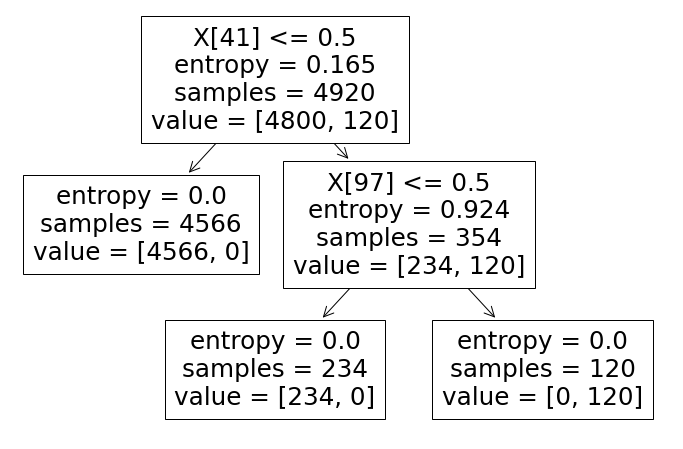

In [237]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifierDT.fit(X_train, y_train)) 

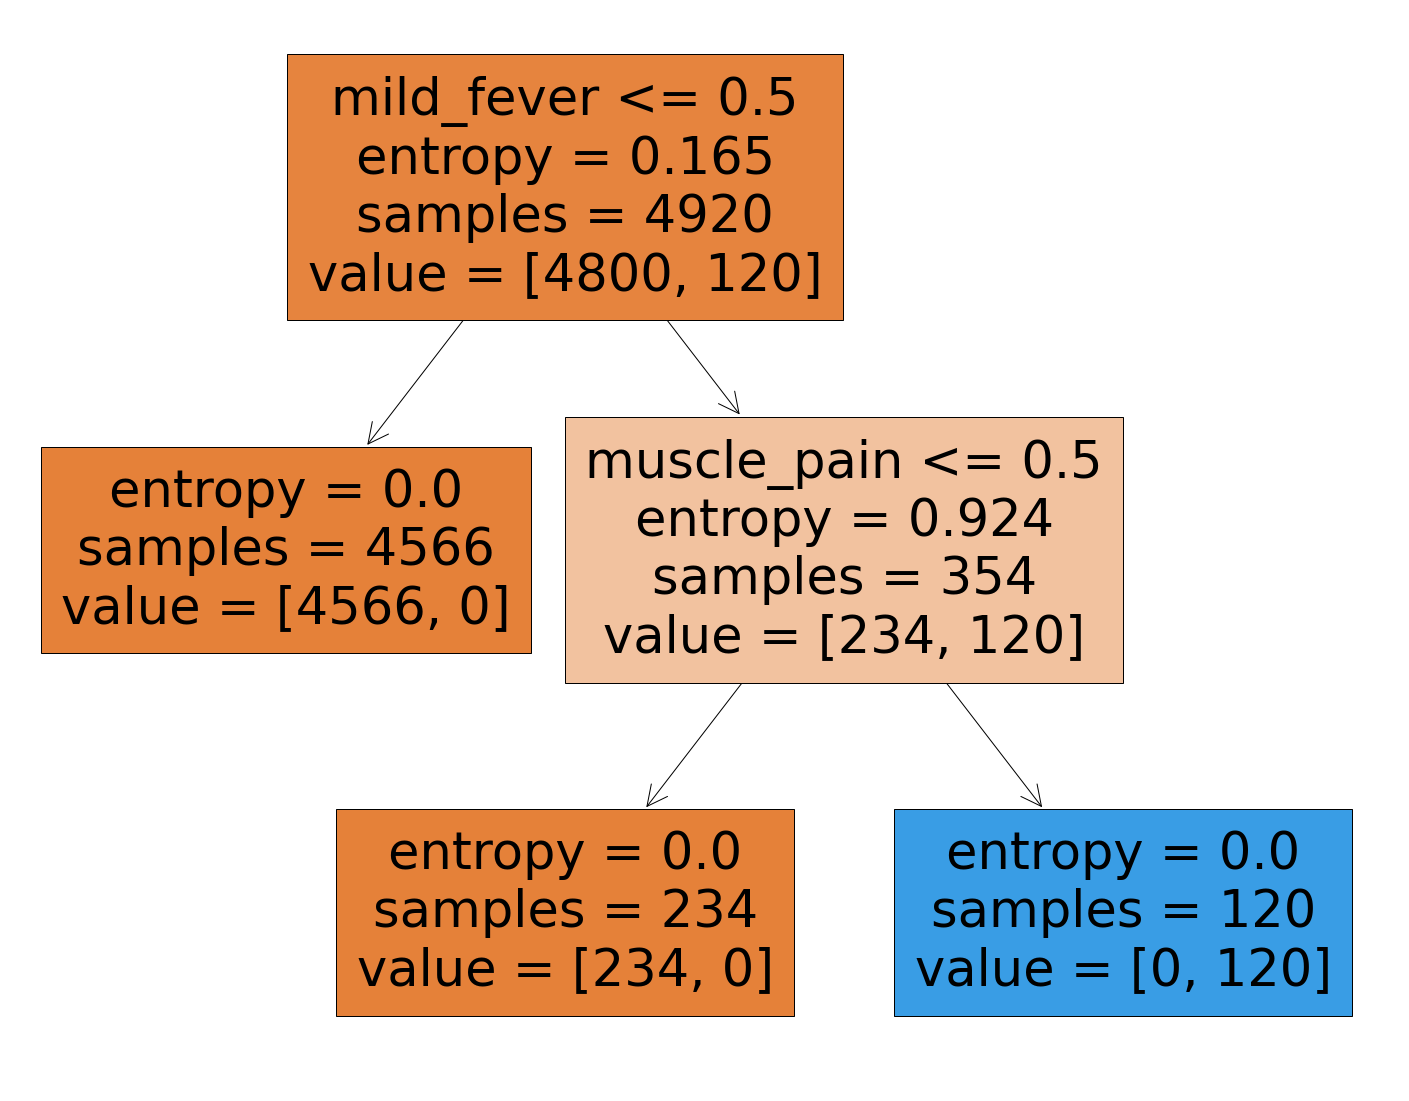

In [238]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifierDT, feature_names=train_data.columns, filled=True)

In [239]:
features = np.asarray(train_data.columns)
features = np.delete(features, 0)
classes = np.asarray(train_data['prognosis'])

In [240]:
# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [241]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [242]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.59818191, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [243]:
# combine list of symptoms and their feature importance into a 2D array
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,symptom,importance
0,itching,0.0
1,skin_rash,0.0
2,nodal_skin_eruptions,0.0
3,continuous_sneezing,0.0
4,shivering,0.0
...,...,...
127,small_dents_in_nails,0.0
128,inflammatory_nails,0.0
129,blister,0.0
130,red_sore_around_nose,0.0


Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

In [244]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

The symptom of 'fatique' is found to have the significantly largest predictive power of 0.1579, out of all the 132 predictors.

On the other hand, the low importance features are identified below.

In [245]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_l

In [246]:
# for DT model
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[41  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Train Accuracy:  1.0
Test Accuracy:  1.0


DT model has an improved performance metrics of 100% test accuracy and recall, and 100% precision and F1-score. Thus, all the prognosis are almost perfectly classified and predicted, and the small difference of 0.8% between the train and test accuracy indicates this DT model suffers from neither overfitting nor underfitting. 


# Confusion matrix

In [248]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predDT)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[41  0]
 [ 0  1]]


# Classification Report 

In [249]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [265]:
rf_clf.fit(X_train, y_train)

print("Accuracy on split test: ", rf_clf.score(X_test,y_test))

<ipython-input-265-2a1494790213>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy on split test:  1.0


In [266]:
symptoms_dict = {}

for index, symptom in enumerate(X_train):
    symptoms_dict[symptom] = index

In [267]:
symptoms_dict


{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

In [268]:
# slicing fisrt 10 symptoms 
import itertools
D=dict(itertools.islice(symptoms_dict.items(), 15))

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

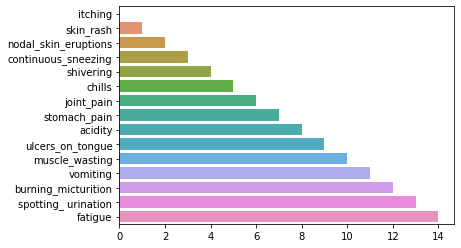

In [269]:
# Accurance of symptoms in test data (first 15)
import seaborn as sns

sns.barplot(list(D.values()), list(D.keys()))

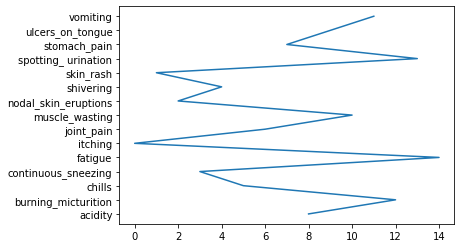

In [270]:
import matplotlib.pylab as plt

lists = sorted(D.items())

x, y = zip(*lists) 

plt.plot(y,x)
plt.show()

In [271]:
input_vector = np.zeros(len(symptoms_dict))

In [272]:
input_vector[[symptoms_dict['itching'], symptoms_dict['skin_rash'],symptoms_dict['nodal_skin_eruptions']]] = 1

In [273]:
rf_clf.predict_proba([input_vector])

array([[1., 0.]])

In [274]:
rf_clf.predict([input_vector])

array([0], dtype=uint8)

# Using Random Forest


In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [283]:
rf_clf = RandomForestClassifier(criterion='entropy')
rf_clf.fit(X_train, y_train)

<ipython-input-283-b2d05898fee2>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(criterion='entropy')

In [284]:
y_predict = rf_clf.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

# Using KNN


In [275]:
from sklearn.neighbors import KNeighborsClassifier


In [276]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [277]:
y_predict = knn.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

# Both the approaches produce the same accuracy.


In [280]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = {'RFC':rf_clf.predict(X_test), "KNN": knn.predict(X_test)}

for classifier, pred in predictions.items():
    cnf_matrix = confusion_matrix(y_test, pred)
    print(classifier,'Confusion matrix: \n',cnf_matrix)
    print(classifier, 'Classification report: \n',classification_report(y_test,pred))

RFC Confusion matrix: 
 [[41  0]
 [ 0  1]]
RFC Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

KNN Confusion matrix: 
 [[41  0]
 [ 0  1]]
KNN Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         1

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# Both the approaches yeild the same results. Following could be the reasons for this performance :
1. There is no noise in the data as the dataset has been hand-picked by the creator.
2. The distribution of the symptoms is normal. There is no skewness in the data.
3. The disease classes are balanced, making it easy to fit the training data.